**Import the basic necessary library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Imported the data read**

In [ ]:
df=pd.read_csv('/content/house_prise_dataset.csv')

**EDA - Exploratory Data Analyses**

In [ ]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
df.isnull().sum().sum()

np.int64(0)

After abserved the data I analye that the data has not any null value so we no need to

drop any column(Its occure when the columns/data  with too many null)              **df.drop(['column_names'],axis=1, inplace=True)**

Impute missing values if the columns holde less number of null value

**df['column'].fillna(df['column'].mean(), inplace=True) --> for numerical column**

**df.fillna(df.mean(numerical_only=True))  --all the numerical columns**

**df['columns'].fillna(df['columns'].mode(), inplace=True)  --> for object**


In [ ]:
df.drop('date', axis=1, inplace=True)

country is same for entire data set so no need to add this column

In [ ]:
df.drop('country',axis=1, inplace=True)

Every house has unique street name so there has no need to add this column because it does not add value of house price

In [ ]:
df.drop('street', axis=1, inplace=True)

statezip does not add value of house price

In [ ]:
df.drop('statezip', axis=1, inplace=True)

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


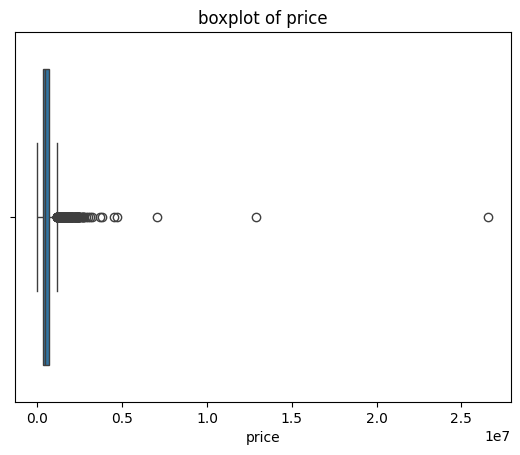

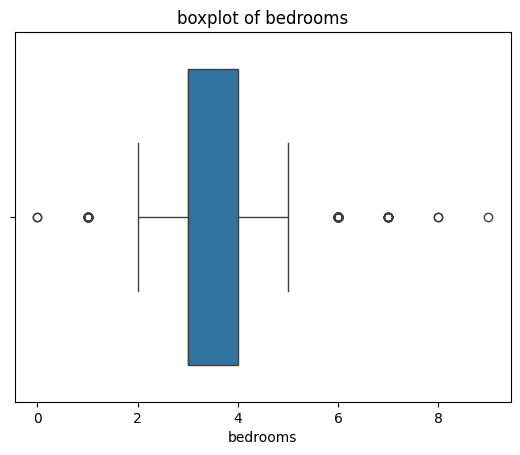

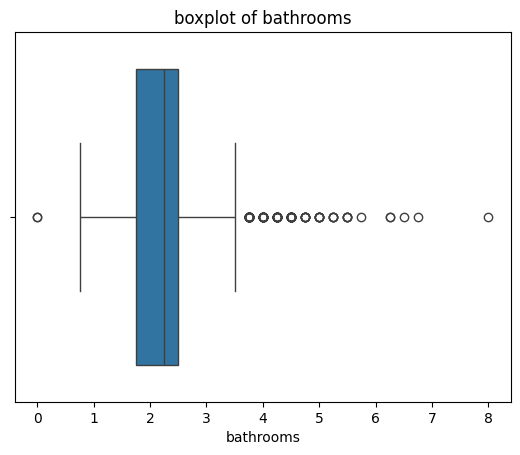

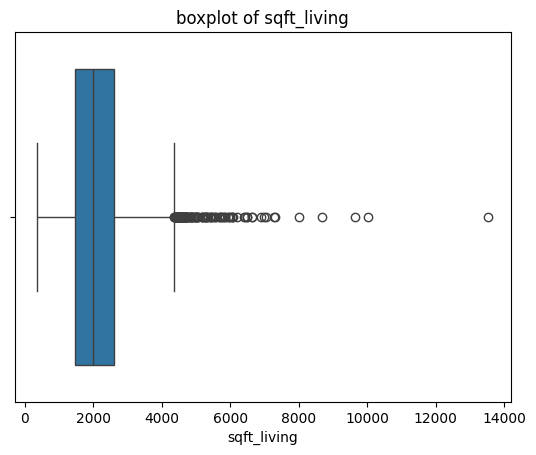

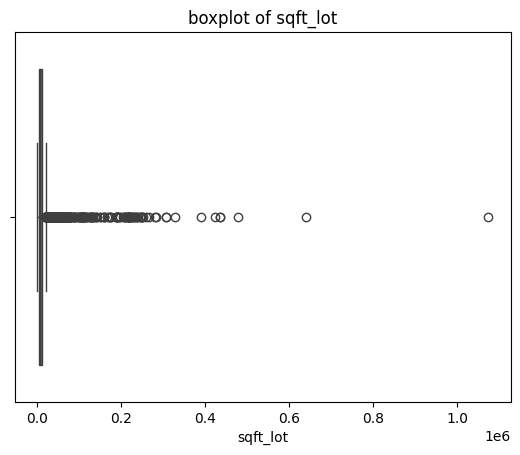

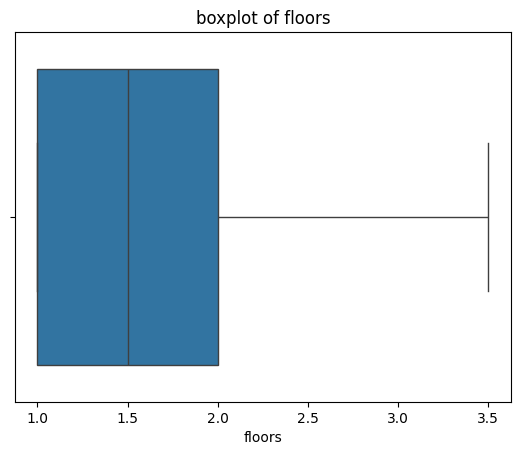

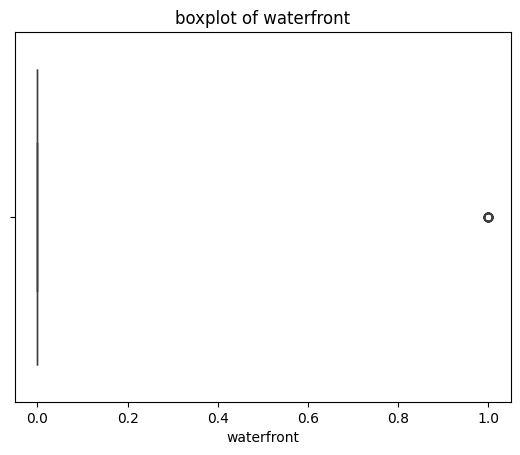

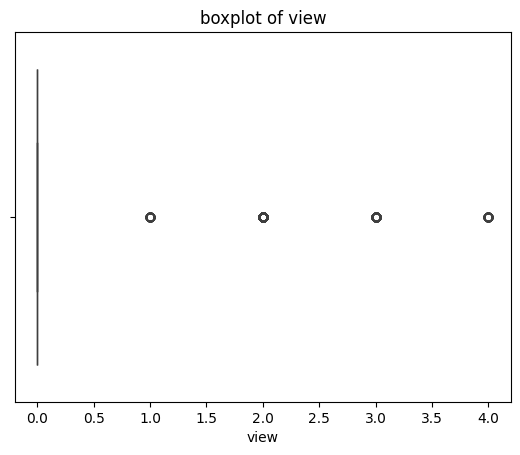

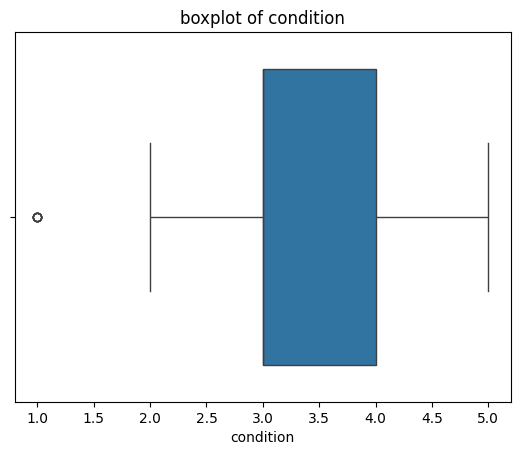

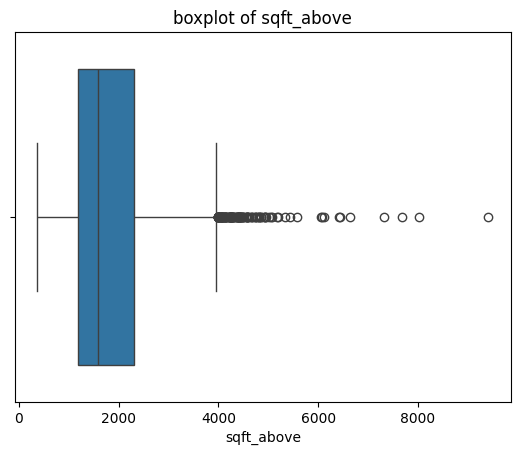

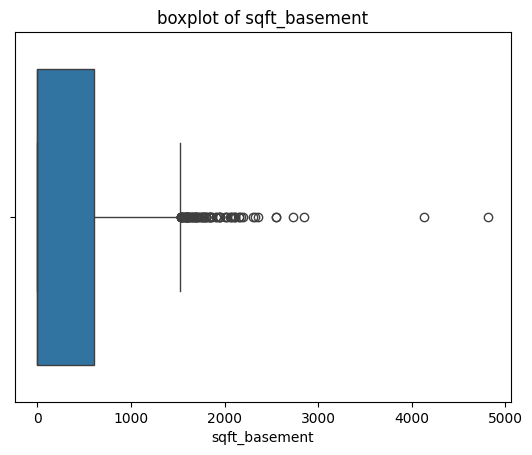

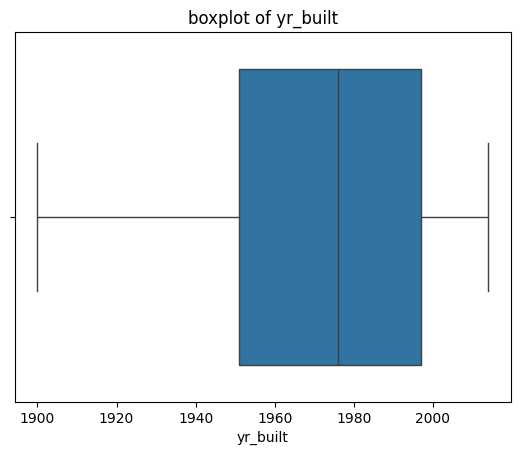

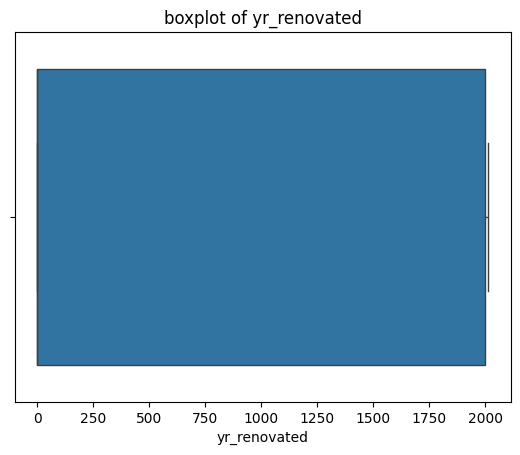

In [ ]:
# Assuming your DataFrame is named df
numerical_cols = df.select_dtypes(include='number').columns

# Create boxplots
# plt.figure(figsize=(15, 8))
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'boxplot of {col}')
    plt.xlabel(col)
    plt.show()



In [ ]:
df_clean=df.copy()
numeric_columns=df_clean.select_dtypes(include='number').columns
for col in numeric_columns:
  Q1=df[col].quantile(.25)
  Q3=df[col].quantile(.75)
  IQR=Q3-Q1
  Lower_Quantile=Q1-1.5*(IQR)
  Upper_Quantile=Q3+1.5*(IQR)

  #Filter the outliers
  df_clean=df_clean[(df_clean[col]>=Lower_Quantile) & (df_clean[col]<=Upper_Quantile)]

df_clean



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3448 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3448 non-null   float64
 1   bedrooms       3448 non-null   float64
 2   bathrooms      3448 non-null   float64
 3   sqft_living    3448 non-null   int64  
 4   sqft_lot       3448 non-null   int64  
 5   floors         3448 non-null   float64
 6   waterfront     3448 non-null   int64  
 7   view           3448 non-null   int64  
 8   condition      3448 non-null   int64  
 9   sqft_above     3448 non-null   int64  
 10  sqft_basement  3448 non-null   int64  
 11  yr_built       3448 non-null   int64  
 12  yr_renovated   3448 non-null   int64  
 13  city           3448 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 404.1+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 503.3+ KB


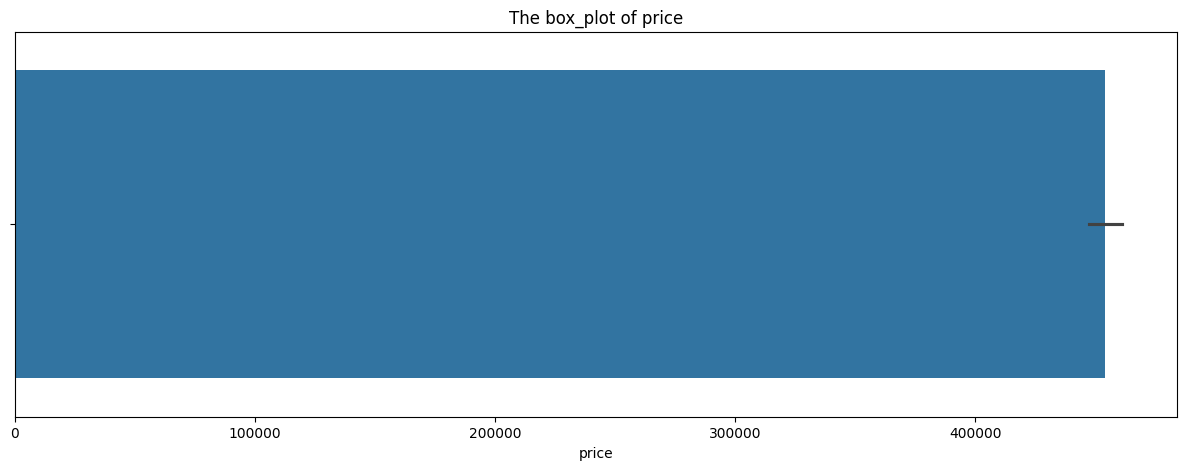

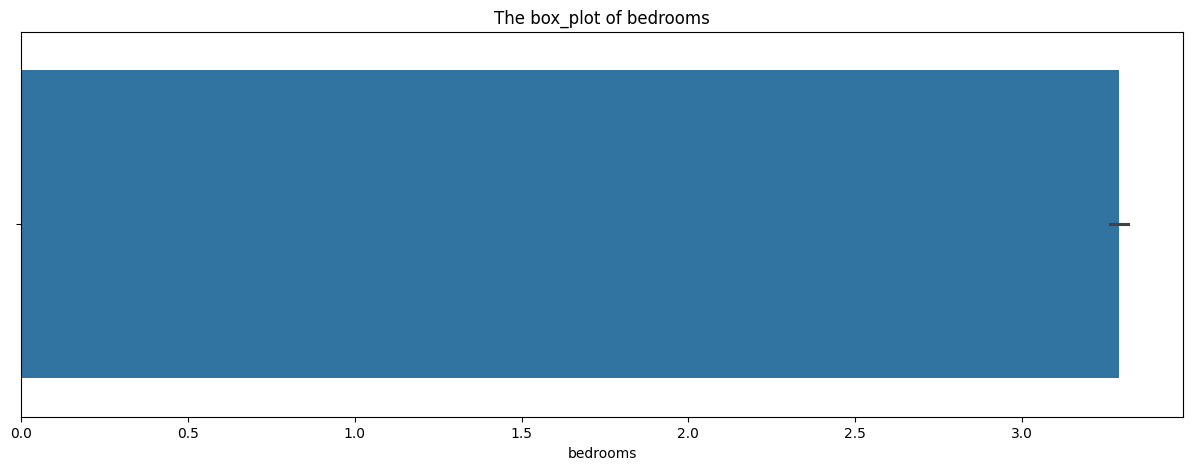

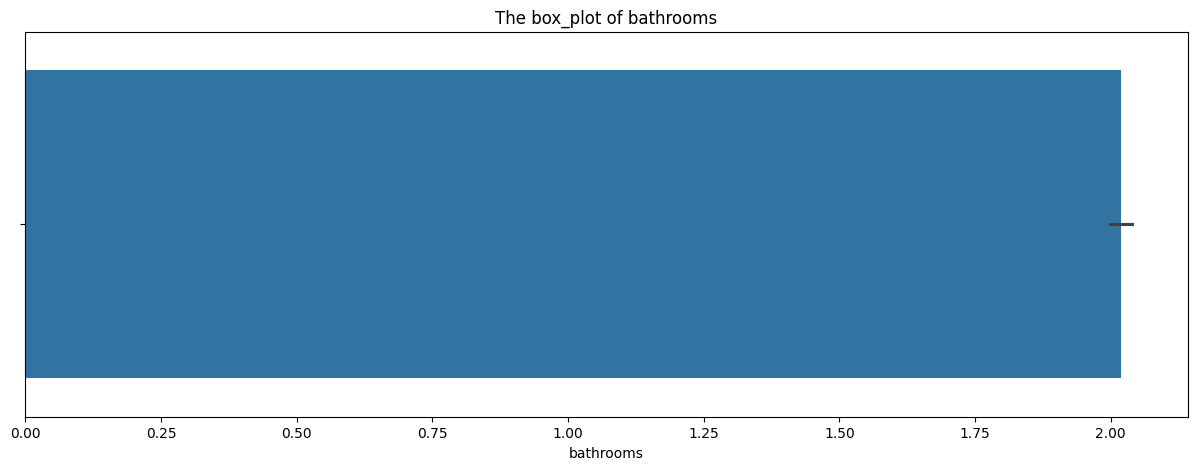

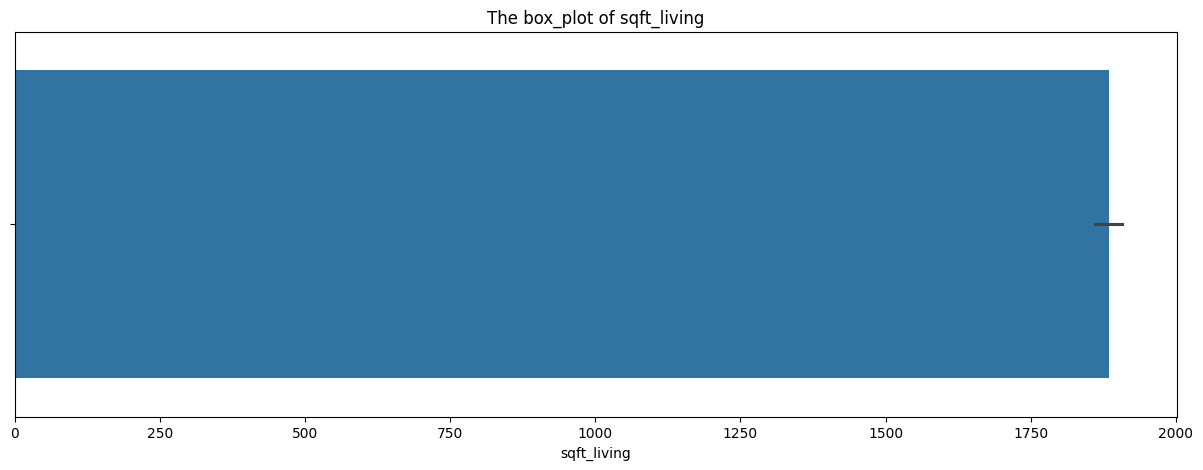

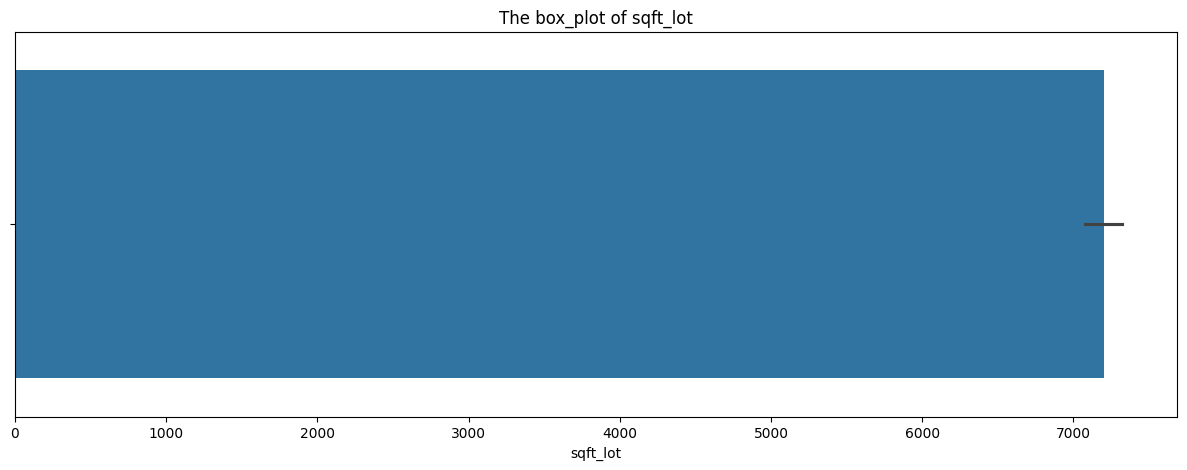

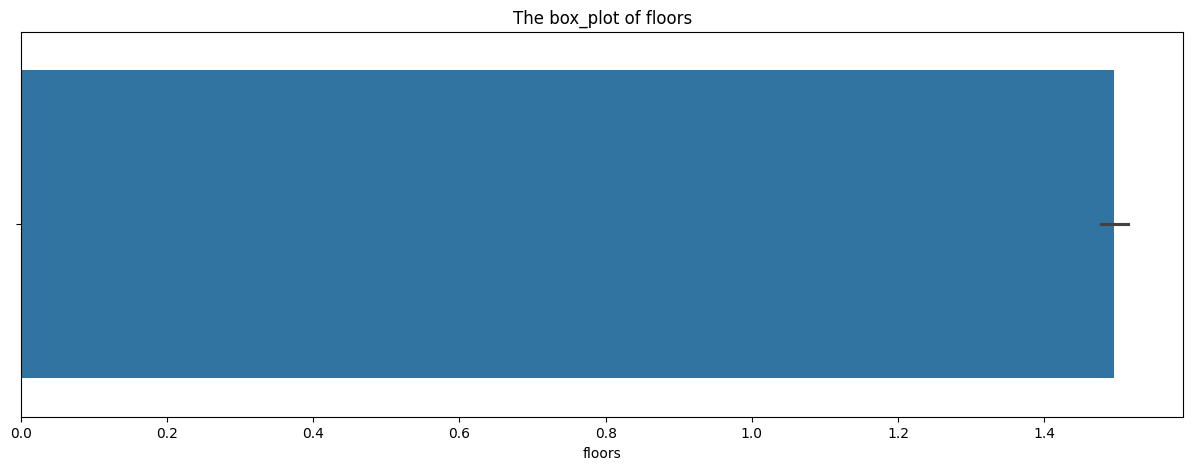

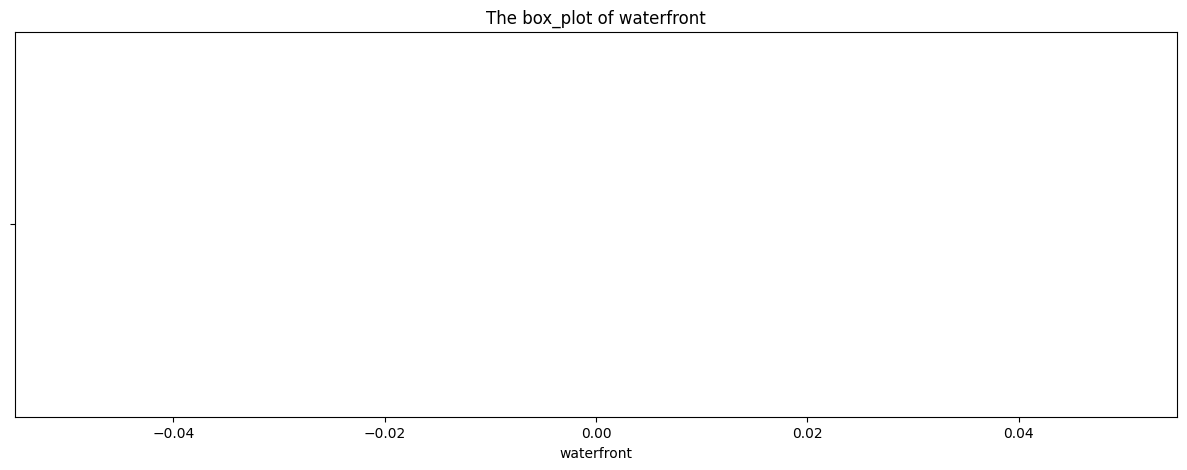

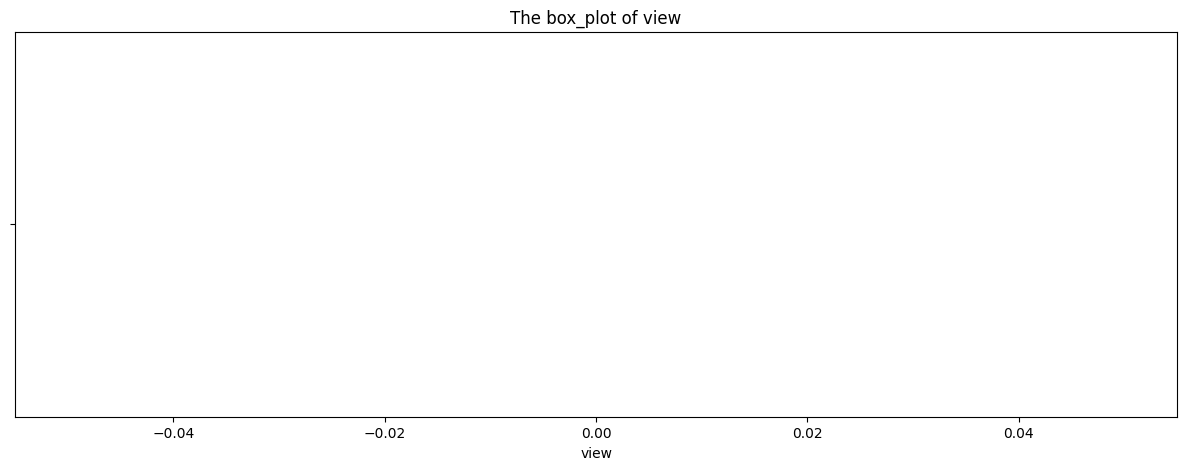

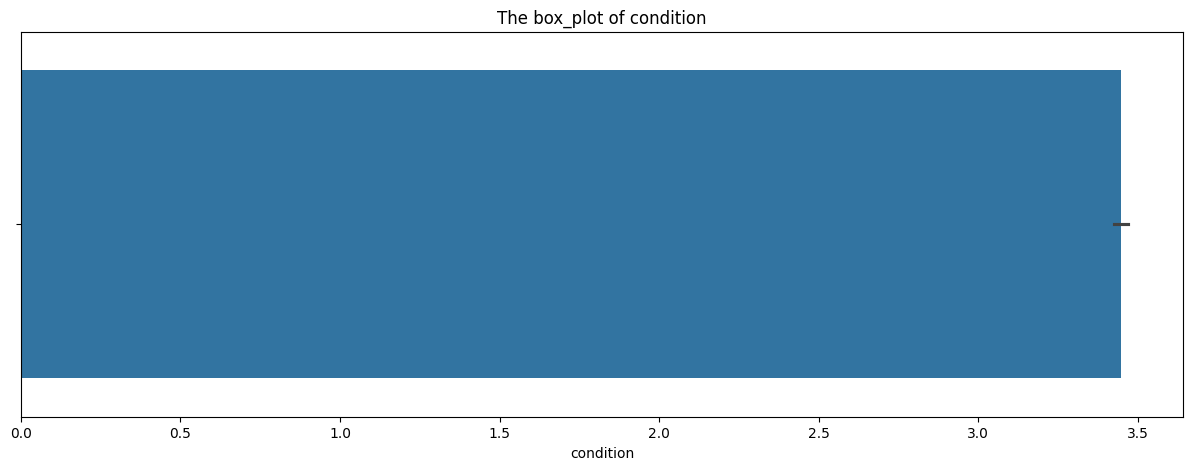

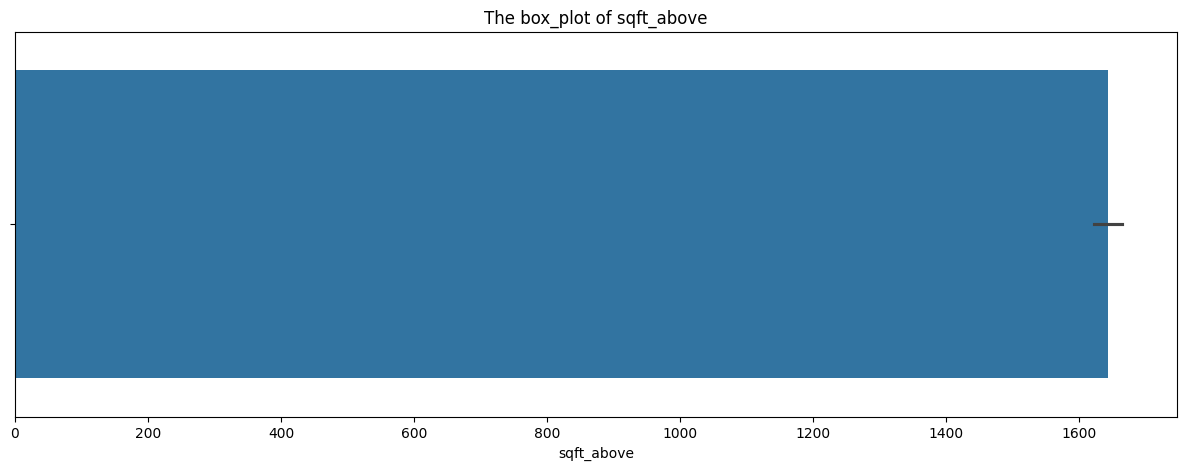

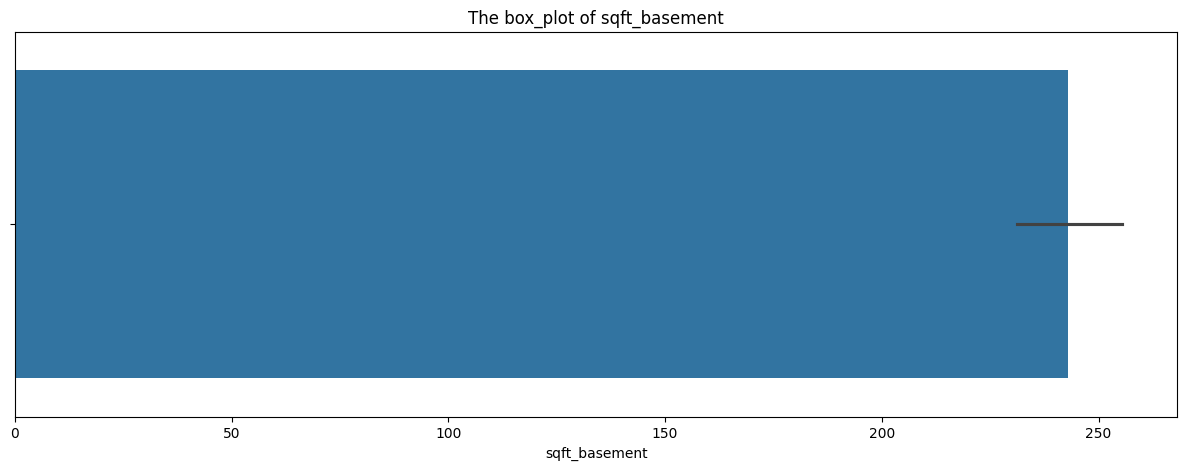

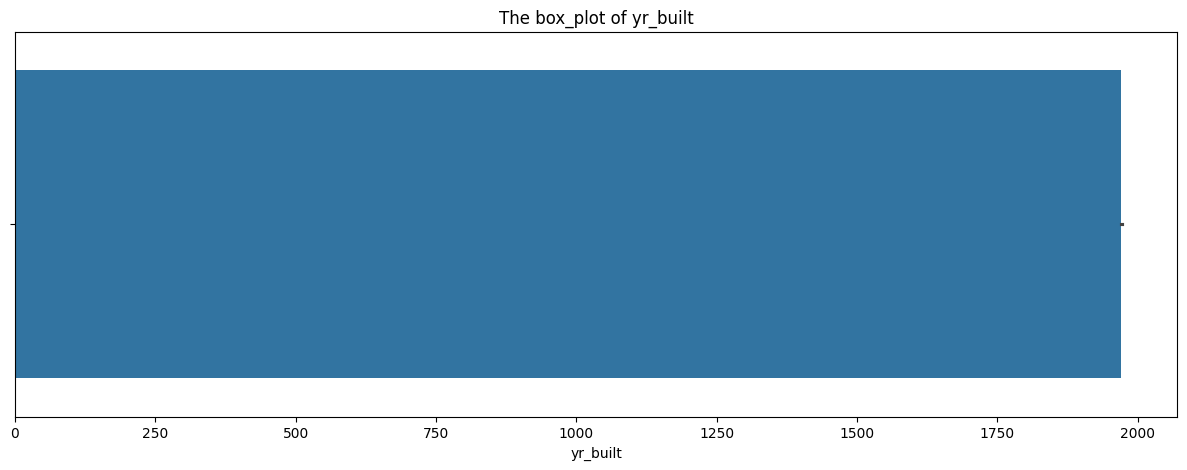

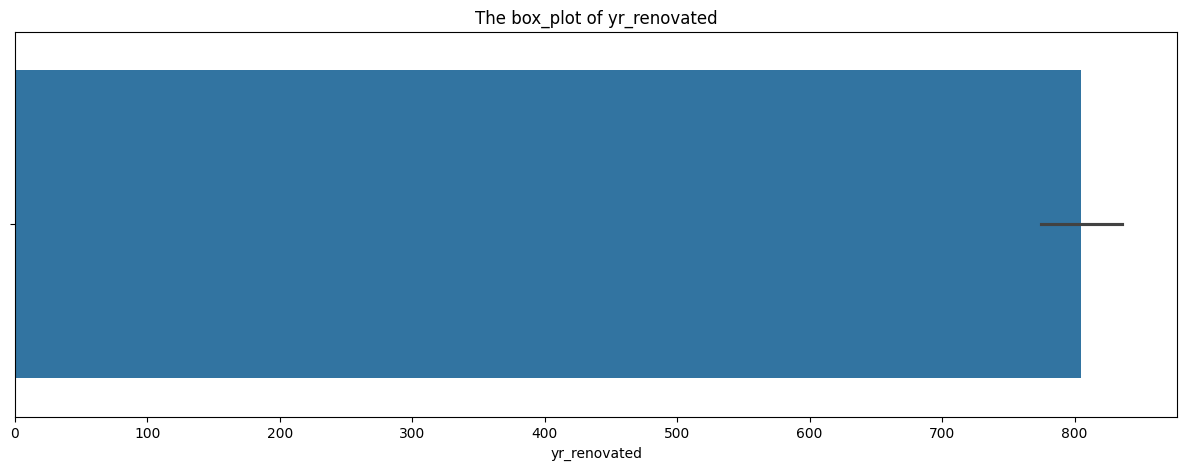

In [ ]:

for col in df_clean.select_dtypes(include='number').columns:
  plt.figure(figsize=(15,5))
  sns.barplot(x=df_clean[col])
  plt.title(f'The box_plot of {col}')
  plt.xlabel(col)
  plt.show()

After removing the outliers we get the df_clean dataset where I remove the outliers


For checking the duplicated value in the entire dataset

In [ ]:
df.duplicated().sum()

np.int64(0)

There has no duplicated value that is why we need to remove the duplicated value. If the duplicated valu is present in the dataset that will slowdown the process for which we remove the duplicated value

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3448 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3448 non-null   float64
 1   bedrooms       3448 non-null   float64
 2   bathrooms      3448 non-null   float64
 3   sqft_living    3448 non-null   int64  
 4   sqft_lot       3448 non-null   int64  
 5   floors         3448 non-null   float64
 6   waterfront     3448 non-null   int64  
 7   view           3448 non-null   int64  
 8   condition      3448 non-null   int64  
 9   sqft_above     3448 non-null   int64  
 10  sqft_basement  3448 non-null   int64  
 11  yr_built       3448 non-null   int64  
 12  yr_renovated   3448 non-null   int64  
 13  city           3448 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 404.1+ KB


Encoded the objected variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df_clean['city']=le.fit_transform(df_clean['city'])

In [ ]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,35


For train test and standrardize the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_clean.drop('price', axis=1)
y = df_clean['price']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = []
trained_models = {}

for name, model in models.items():
    if name in ["Linear Regression", "SVR"]:  # Needs scaled input
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:  # Tree-based models don't need scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))
    trained_models[name] = model


In [ ]:
# Show results
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2 Score"])
print(results_df.sort_values(by='R2 Score', ascending=False))


               Model           MSE  R2 Score
5            XGBoost  1.320330e+10  0.662852
2      Random Forest  1.385652e+10  0.646172
4  Gradient Boosting  1.390402e+10  0.644959
0  Linear Regression  2.068554e+10  0.471793
1      Decision Tree  2.503154e+10  0.360817
3                SVR  4.070906e+10 -0.039510


Best Model: XGBoost Regressor
It has the highest R² score (0.6629), meaning it explains ~66% of the variance in house prices.

It also has the lowest MSE, so the prediction errors are smaller compared to others.

In [ ]:
new_house = pd.DataFrame([{
    'bedrooms': 4,
    'bathrooms': 2.5,
    'sqft_living': 2200,
    'sqft_lot': 6000,
    'floors': 2,
    'waterfront': 0,
    'view': 1,
    'condition': 4,
    'sqft_above': 1600,
    'sqft_basement': 600,
    'yr_built': 2001,
    'yr_renovated': 0,
    'city': 'Seattle'
}])


In [ ]:
# Apply the same LabelEncoder
new_house['city'] = le.transform(new_house['city'])

# # Standardize using the same scaler used for training
# new_house_scaled = scaler.transform(new_house)


In [ ]:
predicted_price = trained_models["XGBoost"].predict(new_house)
print(f"Predicted house price: ₹ {predicted_price[0]}")

Predicted house price: ₹ 515110.84375
